# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Data Ingestion & Wrangling

### Table of Contents
* <b>[Data Understanding and Preparation](#sec1)</b>
    * [The Datasets](#subsec_1_1)
    * [Questions to Research ](#subsec_1_2)
        * [Stage I](#subsec_1_2_1)
        * [Stage II](#subsec_1_2_2)
    * [Packages Used](#subsec_1_3)
* <b>[Covid-19 data](#sec2)</b>
    * [Covid-19 pandemic for the US](#subsec_2_1)
    * [Reading the data](#subec_2_2)
    * [Creating Covid-19 data for Maryland State](#subec_2_3) 
* <b>[Traffic Violation](#sec3)</b>
    * [Reading "Traffic_Violations" data](#subsec_3_1)  
         * [Cleaning Data](#subsec_3_1_1)   
* <b>[Crash Reporting Incidents Data](#sec4)</b>
    * [Reading data](#subsec_4_1)
        * [Cleaning Data](#subsec_4_1_1) 
* <b>[Crash Reporting – Non-Motorists Data](#sec5)</b>
    * [Reading data](#subsec_5_1)
        * [Cleaning Data](#subsec_5_1_1) 
            

# Data Understanding and Preparation <a class="anchor" id="sec1"></a>

The objective of the project is to examine five datasets from [dataMontgomery](https://data.montgomerycountymd.gov/). Two of the data sets is related to Covid-19 and other two is related to crash reporting data. Also, Traffic Violation is considered in the project.

## Data Sets <a class="anchor" id="subsec_1_1"></a>

<b> Covid-19 data  :</b>
    
1. <a href = "https://covidtracking.com/data" URL> [Covid-19 pandemic for the US] <!-- link to site -->  
    
>1. This data is provided by *The Covid Tracking Project* which is a volunteer Organization launched from the *Atlantic*.  Although there are non-reported columns, I am intersted in knowing total number of confirmed cases and deaths in different States and see the trend in different months. 

<b> Trafic Violation  :  <a href = "https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q" URL> [Trafic Violation data]<!-- link to site --> </b>

> This dataset is updated daily and provides traffic violation information from all electronic traffic violations issued in the County. I am specifically interested in creating mapping visualizations utilizing this dataset.


<b> Crash Report :</b>

1.  <a href = "https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf" URL> [Crash Reporting Incident data]<!-- link to site -->
    
2. <a href = "https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5" URL> [Crash Reporting-Non-Motorists data]<!-- link to site -->

## Questions to Research <a class="anchor" id="subsec_1_2"></a>

### Stage I <a class="anchor" id="subsec_1_2_1"></a>


<b>Dataset: </b> Covid-19 data
* Which state has the highest covid case and deaths?
* How does covid confirmed case and deaths change with the season?
* How many people hospitalized from March 2020 to Ovtober 2020?

<b>Dataset: </b> Traffic Violation
* What type/model of car had highest citation?
* What days of the week and month had the highest warning and citations?
* Who (M/F) had highest citations and warnings?

<b>Dataset: </b> Crash Report
* Comapre

### Stage II <a class="anchor" id="subsec_1_2_1"></a>

<b>Dataset: </b> Crash Report Incident Data and Crash Report Non-Motorists Data
* How can we compare Crash Report Incident Data and Crash Report Non-Motorists Data?

<b>Dataset: </b> Traffic Violation and Crash Report Data
* How can we compare Crash Report Incident Data and Crash Report Non-Motorists Data?

# Packages Used <a class="anchor" id="subsec_1_3"></a>

In [1]:
## import packages:
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
from scipy import stats #  library of statistical functions

# 1. Covid-19 data <a class="anchor" id="sec2"></a> 

### Reading the data : Covid-19 pandemic for the US <a class="anchor" id="subsec_2_1"></a> 

In [2]:
covid = pd.read_csv("all-states-history.csv")
# Dimension of the dataframe :
np.shape(covid)

(12026, 43)

In [3]:
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series
covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-10-04,WY,B,53.0,NaN,0,NaN,282.0,282.0,32.0,...,103568.0,139,NaN,NaN,NaN,NaN,102353.0,0,165242.0,0
1,2020-10-04,NE,A,497.0,NaN,4,NaN,2388.0,2388.0,249.0,...,473353.0,3385,NaN,NaN,NaN,NaN,473666.0,3385,649868.0,5236
2,2020-10-04,ND,B,191.0,188.0,0,3.0,925.0,925.0,100.0,...,638320.0,6021,9957.0,NaN,NaN,NaN,247592.0,1586,662284.0,6310
3,2020-10-04,NC,A+,3634.0,3603.0,5,31.0,NaN,NaN,907.0,...,3160968.0,24702,NaN,3996.0,NaN,NaN,NaN,0,3155433.0,24650
4,2020-10-04,MT,C,187.0,NaN,1,NaN,744.0,744.0,191.0,...,357413.0,2630,NaN,NaN,NaN,NaN,NaN,0,357413.0,2630


## Cleaning the Data

### Confirm the date column is in datetime format
> The orignal date format was "Y-m-d" and which is converted to "m/d/Y" format to match with the other datasets considered in the project.

In [4]:
#rename the column
covid = covid.rename(columns={"date":"date_new"})

# Confirm the date column is in datetime format
covid['date_new'] = pd.to_datetime(covid['date_new'], format='%Y-%m-%d')

# observing the datatypes of the dataset
covid.dtypes

date_new                            datetime64[ns]
state                                       object
dataQualityGrade                            object
death                                      float64
deathConfirmed                             float64
deathIncrease                                int64
deathProbable                              float64
hospitalized                               float64
hospitalizedCumulative                     float64
hospitalizedCurrently                      float64
hospitalizedIncrease                         int64
inIcuCumulative                            float64
inIcuCurrently                             float64
negative                                   float64
negativeIncrease                             int64
negativeTestsAntibody                      float64
negativeTestsPeopleAntibody                float64
negativeTestsViral                         float64
onVentilatorCumulative                     float64
onVentilatorCurrently          

### Date format
> The orignal date format was "Y-m-d" and which is converted to "m/d/Y" format to match with the other datasets considered in the project.
Also, new columns : date in "m/d/Y" format and year is created.

In [5]:
# creating a new columns, date, year and month in the data frame
covid['date'] = pd.to_datetime(covid['date_new'], format='%Y-%m-%d').dt.strftime('%m/%d/%Y')
covid['year'] = covid['date_new'].dt.year
covid['month'] = covid['date_new'].dt.month
covid.head()

,date_new,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,date,year,month
0,2020-10-04,WY,B,53.0,NaN,0,NaN,282.0,282.0,32.0,...,NaN,NaN,NaN,102353.0,0,165242.0,0,10/04/2020,2020,10
1,2020-10-04,NE,A,497.0,NaN,4,NaN,2388.0,2388.0,249.0,...,NaN,NaN,NaN,473666.0,3385,649868.0,5236,10/04/2020,2020,10
2,2020-10-04,ND,B,191.0,188.0,0,3.0,925.0,925.0,100.0,...,NaN,NaN,NaN,247592.0,1586,662284.0,6310,10/04/2020,2020,10
3,2020-10-04,NC,A+,3634.0,3603.0,5,31.0,NaN,NaN,907.0,...,3996.0,NaN,NaN,NaN,0,3155433.0,24650,10/04/2020,2020,10
4,2020-10-04,MT,C,187.0,NaN,1,NaN,744.0,744.0,191.0,...,NaN,NaN,NaN,NaN,0,357413.0,2630,10/04/2020,2020,10


## Deleting the Columns


> Deleted the following columns which is not reported by the Covid Tracking Project and which is stored in new data frame, **covid_new**


In [6]:
# Dropping columns which are of not interest 
covid_new = covid.drop(columns=['dataQualityGrade',  'totalTestsAntibody', 'totalTestsPeopleAntibody','totalTestsPeopleAntigen','inIcuCumulative','totalTestEncountersViral','totalTestsAntigen','totalTestEncountersViralIncrease'])
covid_new.head()

,date_new,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,date,year,month
0,2020-10-04,WY,53.0,NaN,0,NaN,282.0,282.0,32.0,1,...,5160.0,103568.0,139,102353.0,0,165242.0,0,10/04/2020,2020,10
1,2020-10-04,NE,497.0,NaN,4,NaN,2388.0,2388.0,249.0,9,...,34395.0,473353.0,3385,473666.0,3385,649868.0,5236,10/04/2020,2020,10
2,2020-10-04,ND,191.0,188.0,0,3.0,925.0,925.0,100.0,13,...,19497.0,638320.0,6021,247592.0,1586,662284.0,6310,10/04/2020,2020,10
3,2020-10-04,NC,3634.0,3603.0,5,31.0,NaN,NaN,907.0,0,...,184422.0,3160968.0,24702,NaN,0,3155433.0,24650,10/04/2020,2020,10
4,2020-10-04,MT,187.0,NaN,1,NaN,744.0,744.0,191.0,3,...,9597.0,357413.0,2630,NaN,0,357413.0,2630,10/04/2020,2020,10


## Creating Covid-19 data for Maryland State <a class="anchor" id="subsec_2_3"></a>

In [7]:
covidMD = covid_new[covid_new['state']=='MD']

In [8]:
# Dimension of the dataframe :
print(np.shape(covidMD))
covidMD.head()

(214, 38)


,date_new,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,date,year,month
12,2020-10-04,MD,3958.0,3814.0,1,144.0,15705.0,15705.0,320.0,35,...,7653.0,1659847.0,10122,1659847.0,10122,2715230.0,26364,10/04/2020,2020,10
65,2020-10-03,MD,3957.0,3813.0,7,144.0,15670.0,15670.0,323.0,96,...,7652.0,1649725.0,9940,1649725.0,9940,2688866.0,28066,10/03/2020,2020,10
119,2020-10-02,MD,3950.0,3806.0,1,144.0,15574.0,15574.0,323.0,32,...,7606.0,1639785.0,11585,1639785.0,11585,2660800.0,30902,10/02/2020,2020,10
177,2020-10-01,MD,3949.0,3805.0,0,144.0,15542.0,15542.0,331.0,12,...,7568.0,1628200.0,10193,1628200.0,10193,2629898.0,23985,10/01/2020,2020,10
232,2020-09-30,MD,3949.0,3805.0,3,144.0,15530.0,15530.0,334.0,70,...,7536.0,1618007.0,7697,1618007.0,7697,2605913.0,17223,09/30/2020,2020,9


### *reset_index()* 

> *reset_index()* is used to reset the row index to make the index start from 0. We can call reset_index() on the dataframe.

In [9]:
covidMD_new = covidMD.reset_index(drop=True)
#With the argument, drop=True, pandas do not keep the original index.
covidMD_new.head()

,date_new,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,recovered,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,date,year,month
0,2020-10-04,MD,3958.0,3814.0,1,144.0,15705.0,15705.0,320.0,35,...,7653.0,1659847.0,10122,1659847.0,10122,2715230.0,26364,10/04/2020,2020,10
1,2020-10-03,MD,3957.0,3813.0,7,144.0,15670.0,15670.0,323.0,96,...,7652.0,1649725.0,9940,1649725.0,9940,2688866.0,28066,10/03/2020,2020,10
2,2020-10-02,MD,3950.0,3806.0,1,144.0,15574.0,15574.0,323.0,32,...,7606.0,1639785.0,11585,1639785.0,11585,2660800.0,30902,10/02/2020,2020,10
3,2020-10-01,MD,3949.0,3805.0,0,144.0,15542.0,15542.0,331.0,12,...,7568.0,1628200.0,10193,1628200.0,10193,2629898.0,23985,10/01/2020,2020,10
4,2020-09-30,MD,3949.0,3805.0,3,144.0,15530.0,15530.0,334.0,70,...,7536.0,1618007.0,7697,1618007.0,7697,2605913.0,17223,09/30/2020,2020,9


## Creating the dataframe, *covid_info* for Maryland and for all States

The new data frames, ***covid_info_MD*** and ***covid_info_St*** are defined by filtering some of the columns and which are used in the later visualizations.

In [10]:
# selecting the columns for all States
columns_St = covid_new[['state','totalTestResults', 'positive', 'negative', 'hospitalized', 'death', 'recovered', 'date', 'year', 'month']]

In [11]:
#creating the new dataframe For All States :
covid_info_St = columns_St.copy()
covid_info_St.head()

,state,totalTestResults,positive,negative,hospitalized,death,recovered,date,year,month
0,WY,103568.0,6504.0,97064.0,282.0,53.0,5160.0,10/04/2020,2020,10
1,NE,473353.0,47403.0,425950.0,2388.0,497.0,34395.0,10/04/2020,2020,10
2,ND,638320.0,23550.0,224042.0,925.0,191.0,19497.0,10/04/2020,2020,10
3,NC,3160968.0,217496.0,2943472.0,NaN,3634.0,184422.0,10/04/2020,2020,10
4,MT,357413.0,14635.0,342778.0,744.0,187.0,9597.0,10/04/2020,2020,10


In [12]:
# selecting the columns for Maryland :
columns_MD = covid_new[['totalTestResults', 'positive', 'negative', 'hospitalized', 'death', 'recovered', 'date', 'year', 'month']]

In [13]:
#creating the new dataframe For Maryland :
covid_info_MD = columns_MD.copy()
covid_info_MD.head()

,totalTestResults,positive,negative,hospitalized,death,recovered,date,year,month
0,103568.0,6504.0,97064.0,282.0,53.0,5160.0,10/04/2020,2020,10
1,473353.0,47403.0,425950.0,2388.0,497.0,34395.0,10/04/2020,2020,10
2,638320.0,23550.0,224042.0,925.0,191.0,19497.0,10/04/2020,2020,10
3,3160968.0,217496.0,2943472.0,NaN,3634.0,184422.0,10/04/2020,2020,10
4,357413.0,14635.0,342778.0,744.0,187.0,9597.0,10/04/2020,2020,10


# 2.Traffic Violation <a class="anchor" id="sec3"></a> 

 ## Reading "Traffic_Violations" data <a class="anchor" id="subsec_3_1"></a>  

In [14]:
traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)
# Dimension of the dataframe :
np.shape(traffic)

(1682250, 43)

In [15]:
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series
traffic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


 ## Cleaning the Data <a class="anchor" id="subsec_3_1_1"></a>  

### Date format

>In the following code, first I have converted the columns, *Date Of Stop* and *Time Of Stop* to date dormat. Then new columns, date, year, time and month are created. I tried to follow this pattern to other data frames as well.


In [16]:
# Confirm the date column is in datetime format
traffic['Date Of Stop'] = pd.to_datetime(traffic['Date Of Stop'], format='%m/%d/%Y')

# Confirm the  time column is in datetime format
traffic['Time Of Stop'] = pd.to_datetime(traffic['Time Of Stop'], format='%H:%M:%S')

# creating a new columns, date, year, time in the data frame
traffic['date'] = pd.to_datetime(traffic['Date Of Stop'], format='%m/%d/%Y').dt.strftime('%m/%d/%Y')
traffic['year'] = traffic['Date Of Stop'].dt.year
traffic['month'] = traffic['Date Of Stop'].dt.month
traffic['time'] = traffic['Time Of Stop'].dt.time
traffic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,1900-01-01 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",07/30/2019,2019,7,22:15:00
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,1900-01-01 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",07/07/2019,2019,7,22:54:00
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,1900-01-01 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)",07/10/2019,2019,7,16:00:00
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,1900-01-01 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",08/15/2019,2019,8,22:42:00
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,1900-01-01 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)",04/15/2019,2019,4,05:49:00


## Replace Yes or No by 0 and 1

In [17]:
#defining new data frame
traffic_replace = traffic.replace( {'Yes' : 1, 'No' : 0})
traffic_replace.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,1900-01-01 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,...,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",07/30/2019,2019,7,22:15:00
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,1900-01-01 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,...,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",07/07/2019,2019,7,22:54:00
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,1900-01-01 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,...,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)",07/10/2019,2019,7,16:00:00
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,1900-01-01 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,...,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",08/15/2019,2019,8,22:42:00
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,1900-01-01 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,...,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)",04/15/2019,2019,4,05:49:00


In [18]:
#rename the column
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
traffic_replace.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,1900-01-01 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,...,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",07/30/2019,2019,7,22:15:00
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,1900-01-01 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,...,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",07/07/2019,2019,7,22:54:00
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,1900-01-01 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,...,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)",07/10/2019,2019,7,16:00:00
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,1900-01-01 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,...,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",08/15/2019,2019,8,22:42:00
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,1900-01-01 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,...,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)",04/15/2019,2019,4,05:49:00


## Count Total NAN
    * Count all NaN in a Data Frame (both columns and rows)
    * Count total NaN at each column in a data Frame.

In [19]:
#Dimension of the Dataframe
traffic_replace.shape

(1682250, 47)

In [20]:
#Total number of NaN
traffic_replace.isnull().sum().sum()

8487696

In [21]:
#Total number NaN at each column
traffic_replace.isnull().sum()

SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                      9
Location                         2
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            634004
Search Disposition         1607813
Search Outcome              653203
Search Reason              1607813
Search Reason For Stop      634205
Search Type                1607821
Search Arrest Reason       1631298
State                           59
VehicleType                      0
Year_model          

## Deleting columns from *traffic_replace* data frame
> In the following code, the columns with highest NaN's  and nonrelevant columns are deleted.

In [22]:
delete_columns = traffic_replace[['SeqID', 'SubAgency', 'Search Conducted', 'Search Disposition', 'Search Outcome' , 'Search Reason', 'Search Reason For Stop', 'Search Type', 'Search Arrest Reason', 'Article', 'Driver City', 'Driver State', 'DL State', 'Arrest Type']]

In [23]:
# Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)
traffic_new.head()

,Date Of Stop,Time Of Stop,Agency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,...,Violation Type,Charge,Contributed To Accident,Race,Gender,Geolocation,date,year,month,time
0,2019-07-30,1900-01-01 22:15:00,MCP,EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,0,0,...,Warning,21-801.1,False,ASIAN,F,"(38.9901016666667, -77.151645)",07/30/2019,2019,7,22:15:00
1,2019-07-07,1900-01-01 22:54:00,MCP,FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,0,0,...,Warning,21-707(a),False,HISPANIC,M,"(39.04036, -77.0511366666667)",07/07/2019,2019,7,22:54:00
2,2019-07-10,1900-01-01 16:00:00,MCP,HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,0,0,...,Warning,11-393.9,False,HISPANIC,M,"(0.0, 0.0)",07/10/2019,2019,7,16:00:00
3,2019-08-15,1900-01-01 22:42:00,MCP,DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,0,0,...,Warning,22-204(f),False,WHITE,F,"(38.997645, -77.0966)",08/15/2019,2019,8,22:42:00
4,2019-04-15,1900-01-01 05:49:00,MCP,DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,0,0,...,Warning,21-309(b),False,BLACK,F,"(0.0, 0.0)",04/15/2019,2019,4,05:49:00


In [48]:
traffic_new["Color"].value_counts()

BLACK          345865
SILVER         306819
WHITE          264670
GRAY           193149
RED            130171
BLUE           122962
GREEN           57749
GOLD            50438
BLUE, DARK      35409
TAN             32495
MAROON          28310
BLUE, LIGHT     21219
BEIGE           18193
GREEN, DK       16873
GREEN, LGT       9026
BROWN            7512
YELLOW           6172
ORANGE           5874
BRONZE           3767
PURPLE           3124
MULTICOLOR       1261
CREAM             975
COPPER            506
PINK              234
CHROME             42
CAMOUFLAGE         35
Name: Color, dtype: int64

## Exploratory Analysis

In [24]:
column_violation = traffic_new[['Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Violation Type']]

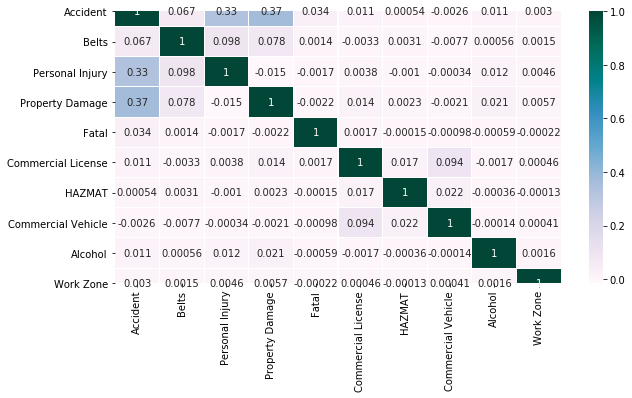

In [25]:
plt.figure(figsize = (10,5))
sns.heatmap(column_violation.corr(), cmap='PuBuGn', annot=True,  linewidths=.1)

In [26]:
column_violation.describe() 

,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone
count,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06
mean,2.499688e-02,3.077188e-02,1.160707e-02,1.975093e-02,2.413434e-04,2.894576e-02,8.738297e-05,3.936395e-03,1.446277e-03,2.080547e-04
std,1.561155e-01,1.726991e-01,1.071091e-01,1.391432e-01,1.553336e-02,1.676542e-01,9.347480e-03,6.261710e-02,3.800245e-02,1.442260e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Correlate with Violation type

In [27]:
table1 = pd.pivot_table(column_violation, values=['Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone'], columns='Violation Type', aggfunc=np.mean)
table1

Violation Type,Citation,ESERO,SERO,Warning
Accident,0.051302,0.002605,0.011123,0.003746
Alcohol,0.003039,0.000113,0.002225,0.000156
Belts,0.040550,0.025794,0.068966,0.022513
Commercial License,0.032137,0.032097,0.043382,0.025801
Commercial Vehicle,0.002600,0.005637,0.065628,0.004899
Fatal,0.000341,0.000101,0.000000,0.000166
HAZMAT,0.000054,0.000138,0.000000,0.000112
Personal Injury,0.024048,0.000239,0.000000,0.001635
Property Damage,0.040349,0.000818,0.000000,0.003251
Work Zone,0.000307,0.000075,0.000000,0.000133


From the above table, it is clear that Belts and Property damage are the highest violation

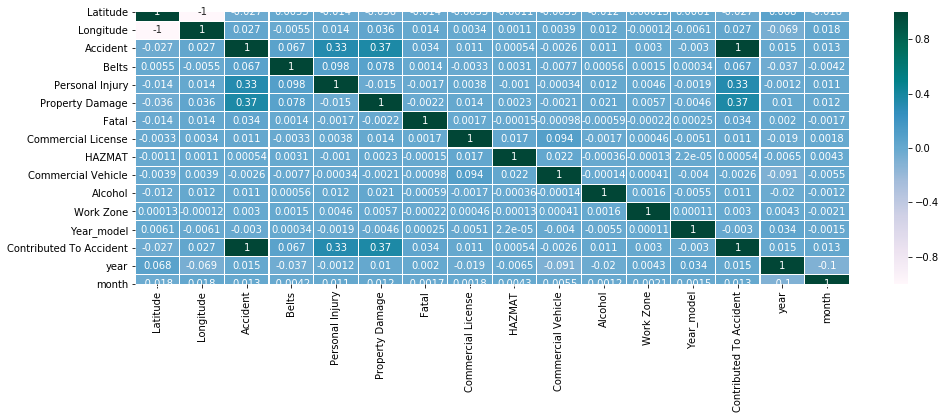

In [28]:
plt.figure(figsize = (16,5))
sns.heatmap(traffic_new.corr(), cmap='PuBuGn', annot=True,  linewidths=.1)

> Most of the correlations are weak. It's interesting how the highest correlation is between Accident and Contributed to Accident. 

> The next highest correlation is between,
    * Personal Injury and Contributed Accident.
    * Property Damage and Contributed Accident.

# 3. Crash Reporting Incidents Data <a class="anchor" id="sec4"></a> 

 ## Reading "Crash Reporting Incidents Data" <a class="anchor" id="subsec_4_1"></a>  

In [29]:
CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
# Dimension of the dataframe :
np.shape(CRI)

(65031, 44)

In [30]:
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series
CRI.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,...,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,MCP21620045,190046911,Montgomery County Police,Property Damage Crash,09/30/2019 10:15:00 AM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150866,-77.059781,"(39.15086647, -77.05978078)"
2,MCP2981002X,190046928,Montgomery County Police,Property Damage Crash,09/30/2019 07:00:00 PM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.060069,-77.047198,"(39.06006941, -77.04719762)"
3,MCP21020022,200014382,Montgomery County Police,Injury Crash,03/29/2020 11:51:00 AM,No,Maryland (State),24.79,North,South,...,OTHER POLE,NON INTERSECTION,NaN,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)"
4,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,No,NaN,NaN,NaN,NaN,...,OTHER POLE,NaN,NaN,NaN,NaN,NaN,NaN,39.103518,-77.157669,"(39.10351817, -77.15766933)"


 ## Cleaning the Data <a class="anchor" id="subsec_4_1_1"></a>  

In [31]:
#Dimension of the Dataframe
print("Dimension of the data set is :", CRI.shape)

#Total number of NaN
print("Total number of NaNs in the entire data frame is :",CRI.isnull().sum().sum())

#Total number NaN at each column
#print("Total number of NaNs in each column is:\n", CRI.isnull().sum())

Dimension of the data set is : (65031, 44)
Total number of NaNs in the entire data frame is : 653266


### Renaming Column

> Here the column name, "Agency Name" is changed to "Agency" to have same name as in "Traffic Violation" data.

In [32]:
#Column name 
CRI_rename = CRI.rename(columns={"Agency Name": "Agency"})
CRI_rename.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,...,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,MCP21620045,190046911,Montgomery County Police,Property Damage Crash,09/30/2019 10:15:00 AM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150866,-77.059781,"(39.15086647, -77.05978078)"
2,MCP2981002X,190046928,Montgomery County Police,Property Damage Crash,09/30/2019 07:00:00 PM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.060069,-77.047198,"(39.06006941, -77.04719762)"
3,MCP21020022,200014382,Montgomery County Police,Injury Crash,03/29/2020 11:51:00 AM,No,Maryland (State),24.79,North,South,...,OTHER POLE,NON INTERSECTION,NaN,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)"
4,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,No,NaN,NaN,NaN,NaN,...,OTHER POLE,NaN,NaN,NaN,NaN,NaN,NaN,39.103518,-77.157669,"(39.10351817, -77.15766933)"


### Replace

> Also, the name "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [33]:
CRI_rename= CRI_rename.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_rename.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,MCP,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,...,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,MCP21620045,190046911,MCP,Property Damage Crash,09/30/2019 10:15:00 AM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150866,-77.059781,"(39.15086647, -77.05978078)"
2,MCP2981002X,190046928,MCP,Property Damage Crash,09/30/2019 07:00:00 PM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.060069,-77.047198,"(39.06006941, -77.04719762)"
3,MCP21020022,200014382,MCP,Injury Crash,03/29/2020 11:51:00 AM,No,Maryland (State),24.79,North,South,...,OTHER POLE,NON INTERSECTION,NaN,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)"
4,DD5620004G,190046109,RPD,Property Damage Crash,09/26/2019 07:20:00 AM,No,NaN,NaN,NaN,NaN,...,OTHER POLE,NaN,NaN,NaN,NaN,NaN,NaN,39.103518,-77.157669,"(39.10351817, -77.15766933)"


In [34]:
# Confirm the date column is in datetime format
CRI_rename['Crash Date/Time'] = pd.to_datetime(CRI_rename['Crash Date/Time'], format='%m/%d/%Y %H:%M:%S %p')
# creating a new columns, date, year and time in the data frame
CRI_rename['date'] = pd.to_datetime(CRI_rename['Crash Date/Time'], format='%m/%d/%Y %H:%M:%S %p').dt.strftime('%m/%d/%Y')
CRI_rename['year'] = CRI_rename['Crash Date/Time'].dt.year
CRI_rename['month'] = CRI_rename['Crash Date/Time'].dt.month
CRI_rename['time'] = CRI_rename['Crash Date/Time'].dt.time
CRI_rename.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,date,year,month,time
0,MCP3048005T,190046316,MCP,Property Damage Crash,2019-09-27 09:38:00,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)",09/27/2019,2019,9,09:38:00
1,MCP21620045,190046911,MCP,Property Damage Crash,2019-09-30 10:15:00,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.150866,-77.059781,"(39.15086647, -77.05978078)",09/30/2019,2019,9,10:15:00
2,MCP2981002X,190046928,MCP,Property Damage Crash,2019-09-30 07:00:00,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.060069,-77.047198,"(39.06006941, -77.04719762)",09/30/2019,2019,9,07:00:00
3,MCP21020022,200014382,MCP,Injury Crash,2020-03-29 11:51:00,No,Maryland (State),24.79,North,South,...,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)",03/29/2020,2020,3,11:51:00
4,DD5620004G,190046109,RPD,Property Damage Crash,2019-09-26 07:20:00,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.103518,-77.157669,"(39.10351817, -77.15766933)",09/26/2019,2019,9,07:20:00


# 4. Crash Reporting – Non-Motorists Data <a class="anchor" id="sec5"></a> 

 ## Reading "Crash Reporting - Non-Motorists Data"  <a class="anchor" id="subsec_5_1"></a>  

In [35]:
CRNM= pd.read_csv("Crash_Reporting_-_Non-Motorists_Data.csv")

In [36]:
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series
CRNM.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
0,MCP29730056,200029057,Montgomery County Police,Injury Crash,07/27/2020 02:09:00 AM,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,NaN,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,NaN,39.050164,-77.051634,"(39.05016403, -77.05163365)"
1,MCP28460064,200028872,Montgomery County Police,Injury Crash,07/25/2020 12:24:00 PM,NaN,NaN,NaN,NaN,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,NO IMPROPER ACTIONS,SIDEWALK,NaN,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)"
2,DD5604003K,200029470,Rockville Police Departme,Injury Crash,07/29/2020 04:41:00 PM,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,NaN,...,FAILURE TO OBEY TRAFFIC SIGNS SIGNALS OR OFFICER,ON ROADWAY NOT AT CROSSWALK,NO PED. SIGNAL,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)"
3,MCP23480052,190024574,Montgomery County Police,Injury Crash,05/23/2019 05:30:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,NaN,...,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,NaN,39.041653,-77.051877,"(39.04165333, -77.05187667)"
4,MCP20160048,190026280,Montgomery County Police,Injury Crash,06/02/2019 12:19:00 PM,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,NaN,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)"


## Cleaning the Data <a class="anchor" id="subsec_5_1_1"></a>  

In [37]:
#Dimension of the Dataframe
print("Dimension of the data set is :", CRNM.shape)

#Total number of NaN
print("Total number of NaNs in the entire data frame is :",CRNM.isnull().sum().sum())

#Total number NaN at each column
#print("Total number of NaNs in each column is:\n", CRNM.isnull().sum())

Dimension of the data set is : (3738, 32)
Total number of NaNs in the entire data frame is : 16700


### Renaming Column

> Here the column name, "Agency Name" is changed to "Agency" to have same name as in "Traffic Violation" data.

In [38]:
#Column name 
CRNM_rename = CRNM.rename(columns={"Agency Name": "Agency"})
CRNM_rename.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
0,MCP29730056,200029057,Montgomery County Police,Injury Crash,07/27/2020 02:09:00 AM,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,NaN,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,NaN,39.050164,-77.051634,"(39.05016403, -77.05163365)"
1,MCP28460064,200028872,Montgomery County Police,Injury Crash,07/25/2020 12:24:00 PM,NaN,NaN,NaN,NaN,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,NO IMPROPER ACTIONS,SIDEWALK,NaN,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)"
2,DD5604003K,200029470,Rockville Police Departme,Injury Crash,07/29/2020 04:41:00 PM,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,NaN,...,FAILURE TO OBEY TRAFFIC SIGNS SIGNALS OR OFFICER,ON ROADWAY NOT AT CROSSWALK,NO PED. SIGNAL,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)"
3,MCP23480052,190024574,Montgomery County Police,Injury Crash,05/23/2019 05:30:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,NaN,...,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,NaN,39.041653,-77.051877,"(39.04165333, -77.05187667)"
4,MCP20160048,190026280,Montgomery County Police,Injury Crash,06/02/2019 12:19:00 PM,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,NaN,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)"


### Replace

> Also, the name "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [39]:
CRNM_rename = CRNM_rename.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_rename.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
0,MCP29730056,200029057,MCP,Injury Crash,07/27/2020 02:09:00 AM,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,NaN,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,NaN,39.050164,-77.051634,"(39.05016403, -77.05163365)"
1,MCP28460064,200028872,MCP,Injury Crash,07/25/2020 12:24:00 PM,NaN,NaN,NaN,NaN,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,NO IMPROPER ACTIONS,SIDEWALK,NaN,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)"
2,DD5604003K,200029470,RPD,Injury Crash,07/29/2020 04:41:00 PM,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,NaN,...,FAILURE TO OBEY TRAFFIC SIGNS SIGNALS OR OFFICER,ON ROADWAY NOT AT CROSSWALK,NO PED. SIGNAL,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)"
3,MCP23480052,190024574,MCP,Injury Crash,05/23/2019 05:30:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,NaN,...,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,NaN,39.041653,-77.051877,"(39.04165333, -77.05187667)"
4,MCP20160048,190026280,MCP,Injury Crash,06/02/2019 12:19:00 PM,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,NaN,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)"


In [40]:
# Confirm the date column is in datetime format
CRNM_rename['Crash Date/Time'] = pd.to_datetime(CRNM_rename['Crash Date/Time'], format='%m/%d/%Y %H:%M:%S %p')
# creating a new columns, date, year and time in the data frame
CRNM_rename['date'] = pd.to_datetime(CRNM_rename['Crash Date/Time'], format='%m/%d/%Y %H:%M:%S %p').dt.strftime('%m/%d/%Y')
CRNM_rename['year'] = CRNM_rename['Crash Date/Time'].dt.year
CRNM_rename['month'] = CRNM_rename['Crash Date/Time'].dt.month
CRNM_rename['time'] = CRNM_rename['Crash Date/Time'].dt.time
CRNM_rename.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location,date,year,month,time
0,MCP29730056,200029057,MCP,Injury Crash,2020-07-27 02:09:00,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,NaN,...,No,SUSPECTED SERIOUS INJURY,NaN,39.050164,-77.051634,"(39.05016403, -77.05163365)",07/27/2020,2020,7,02:09:00
1,MCP28460064,200028872,MCP,Injury Crash,2020-07-25 12:24:00,NaN,NaN,NaN,NaN,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,No,SUSPECTED MINOR INJURY,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)",07/25/2020,2020,7,12:24:00
2,DD5604003K,200029470,RPD,Injury Crash,2020-07-29 04:41:00,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,NaN,...,Yes,SUSPECTED MINOR INJURY,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)",07/29/2020,2020,7,04:41:00
3,MCP23480052,190024574,MCP,Injury Crash,2019-05-23 05:30:00,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,NaN,...,No,SUSPECTED SERIOUS INJURY,NaN,39.041653,-77.051877,"(39.04165333, -77.05187667)",05/23/2019,2019,5,05:30:00
4,MCP20160048,190026280,MCP,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,NaN,...,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",06/02/2019,2019,6,12:19:00


# Merging Two Data Frames : Crash Incident Data and Crash Non-Motorists Data



## Creating new data frame for Crash Incidents Data 

> The following filiters are made to define new data frame
    * Certain colomns are selected, viz., Agency, Hit/Run, At Fault, Weather etc.
    * New column, dataframe is inserted to identify the data frame.
    * Only Motgomery County Police is considered.

In [41]:
##Selecting the columns
CRI_columns = CRI_rename[['Agency', 'Collision Type', 'Hit/Run' , 'At Fault' , 'Weather', 'Traffic Control', 'Driver Substance Abuse','year','month']]

## Creating new data frame for Crash Incidents Data 
CRI_new = CRI_columns.copy()

# inserting a new column to identify the data frame
CRI_new.insert(1, 'dataframe', 'Incident')

#
CRI_new = CRI_new[CRI_new['Agency']=='MCP']

CRI_new.head()

,Agency,dataframe,Collision Type,Hit/Run,At Fault,Weather,Traffic Control,Driver Substance Abuse,year,month
0,MCP,Incident,SINGLE VEHICLE,No,DRIVER,CLEAR,NaN,NaN,2019,9
1,MCP,Incident,OTHER,Yes,DRIVER,CLEAR,NO CONTROLS,NaN,2019,9
2,MCP,Incident,OTHER,Yes,DRIVER,CLEAR,NaN,"NONE DETECTED, UNKNOWN",2019,9
3,MCP,Incident,SINGLE VEHICLE,No,DRIVER,CLOUDY,NO CONTROLS,NONE DETECTED,2020,3
5,MCP,Incident,SINGLE VEHICLE,No,DRIVER,RAINING,TRAFFIC SIGNAL,ALCOHOL PRESENT,2020,3


## Creating new data frame for Crash Non-Motorists Data 

> The following filiters are made to define new data frame
    * Certain colomns are selected, viz., Agency, Hit/Run, At Fault, Weather etc.
    * New column, dataframe is inserted to identify the data frame.
    * Only Motgomery County Police is considered.

In [42]:
##Selecting the columns
CRNM_columns = CRNM_rename[['Agency', 'Collision Type', 'At Fault' , 'Weather', 'Traffic Control', 'Pedestrian Movement','year','month']]

## Creating new data frame for Crash Incidents Data 
CRNM_new = CRNM_columns.copy()

# inserting a new column to identify the data frame
CRNM_new.insert(1, 'dataframe', 'Non-motorists')

#
CRNM_new = CRNM_new[CRNM_new['Agency']=='MCP']

CRNM_new.head()

,Agency,dataframe,Collision Type,At Fault,Weather,Traffic Control,Pedestrian Movement,year,month
0,MCP,Non-motorists,OTHER,No,CLEAR,NO CONTROLS,Walking/Riding against Traffic,2020,7
1,MCP,Non-motorists,SINGLE VEHICLE,No,CLEAR,NO CONTROLS,Walking/Cycling on Sidewalk,2020,7
3,MCP,Non-motorists,OTHER,No,CLEAR,TRAFFIC SIGNAL,Cross/Enter at Intersection,2019,5
4,MCP,Non-motorists,SINGLE VEHICLE,No,CLOUDY,NaN,Walking/Cycling on Sidewalk,2019,6
5,MCP,Non-motorists,SINGLE VEHICLE,No,CLEAR,NaN,Unknown,2019,6


In [43]:
result = pd.concat([CRI_new, CRNM_new], join='outer', sort=False)
result

,Agency,dataframe,Collision Type,Hit/Run,At Fault,Weather,Traffic Control,Driver Substance Abuse,year,month,Pedestrian Movement
0,MCP,Incident,SINGLE VEHICLE,No,DRIVER,CLEAR,NaN,NaN,2019,9,NaN
1,MCP,Incident,OTHER,Yes,DRIVER,CLEAR,NO CONTROLS,NaN,2019,9,NaN
2,MCP,Incident,OTHER,Yes,DRIVER,CLEAR,NaN,"NONE DETECTED, UNKNOWN",2019,9,NaN
3,MCP,Incident,SINGLE VEHICLE,No,DRIVER,CLOUDY,NO CONTROLS,NONE DETECTED,2020,3,NaN
5,MCP,Incident,SINGLE VEHICLE,No,DRIVER,RAINING,TRAFFIC SIGNAL,ALCOHOL PRESENT,2020,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3733,MCP,Non-motorists,SINGLE VEHICLE,NaN,No,CLEAR,TRAFFIC SIGNAL,NaN,2017,3,Cross/Enter at Intersection
3734,MCP,Non-motorists,SINGLE VEHICLE,NaN,No,NaN,NO CONTROLS,NaN,2016,9,NaN
3735,MCP,Non-motorists,SINGLE VEHICLE,NaN,No,CLEAR,NaN,NaN,2018,2,Cross/Enter at Intersection
3736,MCP,Non-motorists,SINGLE VEHICLE,NaN,Yes,CLEAR,NaN,NaN,2017,8,Playing


## The number of crashes involving non-motorists and general collision

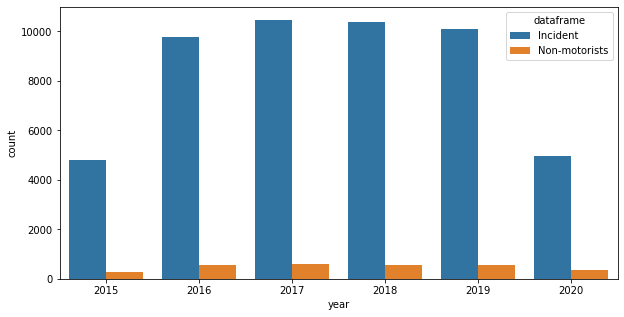

In [44]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="year", hue="dataframe", data=result)

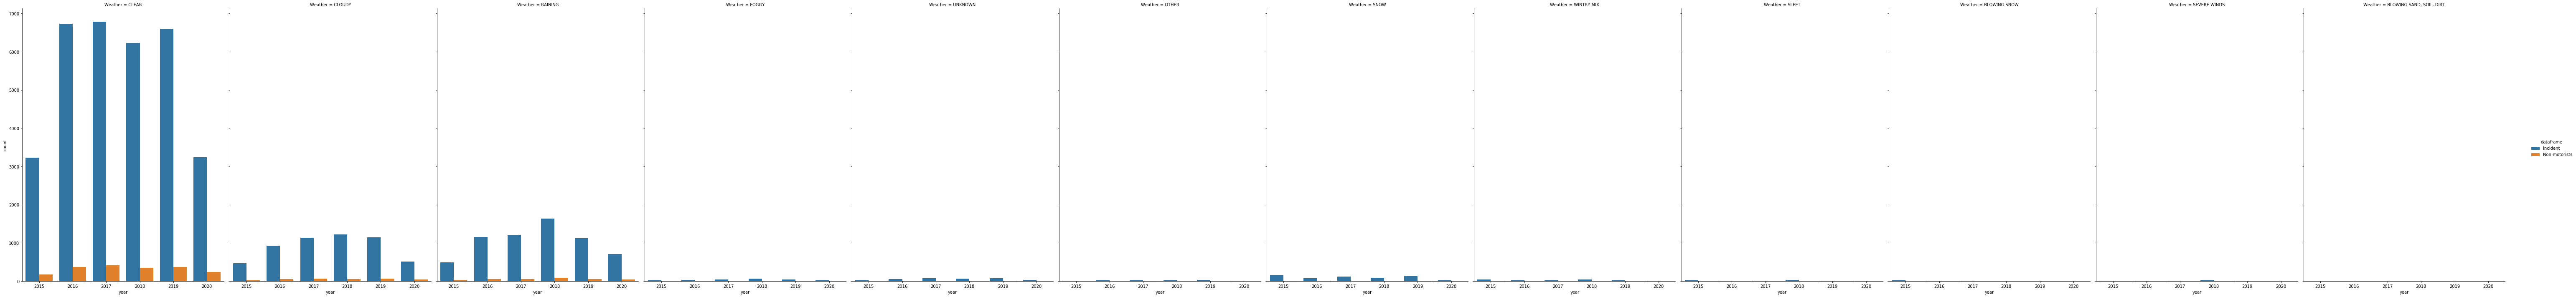

In [45]:
g = sns.catplot(x="year", hue="dataframe", col="Weather",
                data=result, kind="count",
                height=10, aspect=.7);

#### * Still wrking on joining the data